## XGBoost Classifier Model

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# For checking model accuracy and performance
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
import numpy as np  # Importing NumPy for loading .npz files

# Load the previously saved train-test split from the .npz file
data = np.load('Dataset/train_test_split.npz')

# Extract the training features
X_train = data['X_train']

# Extract the testing features
X_test = data['X_test']

# Extract the training labels
y_train = data['y_train']

# Extract the testing labels
y_test = data['y_test']

In [5]:
from xgboost import XGBClassifier

xgb = XGBClassifier(eval_metric='mlogloss')
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
print("Accuracy of XGBoostClassifier:", xgb_accuracy)

print('Classification report of XGBoostClassifier:')
print(classification_report(y_test, y_pred_xgb))

Accuracy of XGBoostClassifier: 0.9823038341692634
Classification report of XGBoostClassifier:
              precision    recall  f1-score   support

           0       0.97      0.96      0.97     12784
           1       0.98      0.98      0.98     19820
           2       0.97      0.99      0.98     12092
           3       1.00      1.00      1.00     15317

    accuracy                           0.98     60013
   macro avg       0.98      0.98      0.98     60013
weighted avg       0.98      0.98      0.98     60013



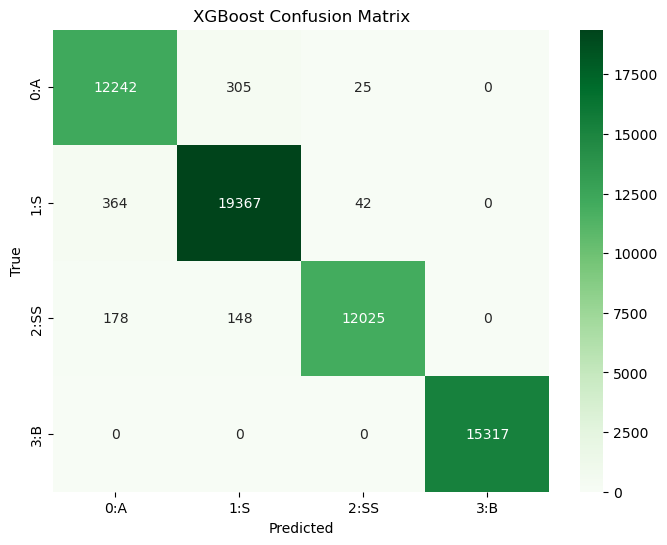

In [7]:
# Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt

matrix = confusion_matrix(y_pred_xgb , y_test)
plt.figure(figsize=(8, 6))
sns.heatmap(matrix, annot=True, fmt='d', cmap='Greens',
            xticklabels=["0:A", "1:S", "2:SS", "3:B"], yticklabels=["0:A", "1:S", "2:SS", "3:B"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("XGBoost Confusion Matrix")
plt.show()

In [8]:
# FP = Total predicted as a class but were actually something else
false_positives_per_class = matrix.sum(axis=0) - np.diag(matrix)
xgb_tfp = false_positives_per_class.sum()

print("\n🚨 False Positives Per Class:")
for i, fp in enumerate(false_positives_per_class):
    print(f"  ➤ Class {i} (Label: {'A' if i==0 else 'S' if i==1 else 'SS' if i==2 else 'B'}): {fp}")

print("\n❗ Total False Positives in Model:", xgb_tfp)


🚨 False Positives Per Class:
  ➤ Class 0 (Label: A): 542
  ➤ Class 1 (Label: S): 453
  ➤ Class 2 (Label: SS): 67
  ➤ Class 3 (Label: B): 0

❗ Total False Positives in Model: 1062


In [9]:
import joblib

# Save the model
joblib.dump(xgb, 'Model/xgb_model.pkl')

['Model/xgb_model.pkl']